# Linear and non-linear regression
>> AUTHOR : Krashna Gurme

## Use Case
    1. Perform an exploratory data analysis to identify the variables that could be used for predicting "Total Profit" per quarter.
    2. Identify the **optimal** linear regression model for predicting the "Total Profit" per quarter. Justify your approach
    3. Build a non-linear model for predicting the "Total Profit" per year. Justify your choice of the non-linear model
    4. Develop an anomalies detection model for predicting anomalies in "Unit Price". For this model, unit price data should be treated as a time series data with the series order being identified using the variable "Ship Date"


In [1]:
# Importing necessary packages
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from math import sqrt
import stat
sns.set(style="white")

C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# reading csv into dataframe
df = pd.read_csv('Data.csv')
df_new = df
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.00
1,Europe,Latvia,Beverages,Online,C,12/28/2015,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.50
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,1/13/2011,141515767,2/1/2011,6515,154.06,90.93,1003700.90,592408.95,411291.95
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,9/11/2012,500364005,10/6/2012,7683,668.27,502.54,5134318.41,3861014.82,1273303.59
4,Europe,Czech Republic,Beverages,Online,C,10/27/2015,127481591,12/5/2015,3491,47.45,31.79,165647.95,110978.89,54669.06


In [3]:
print("\n Description",df.describe())


 Description            Order ID    Units Sold    Unit Price     Unit Cost  Total Revenue  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   1.000000e+04   
mean   5.498719e+08   5002.855900    268.143139    188.806639   1.333355e+06   
std    2.607835e+08   2873.246454    217.944092    176.445907   1.465026e+06   
min    1.000892e+08      2.000000      9.330000      6.920000   1.679400e+02   
25%    3.218067e+08   2530.750000    109.280000     56.670000   2.885511e+05   
50%    5.485663e+08   4962.000000    205.700000    117.110000   8.000512e+05   
75%    7.759981e+08   7472.000000    437.200000    364.690000   1.819143e+06   
max    9.999342e+08  10000.000000    668.270000    524.960000   6.680027e+06   

         Total Cost  Total Profit  
count  1.000000e+04  1.000000e+04  
mean   9.382658e+05  3.950893e+05  
std    1.145914e+06  3.775550e+05  
min    1.245600e+02  4.338000e+01  
25%    1.647855e+05  9.832914e+04  
50%    4.816058e+05  2.890990e+05  
75%    1.1838

In [4]:
print("Information:", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          10000 non-null  object 
 1   Country         10000 non-null  object 
 2   Item Type       10000 non-null  object 
 3   Sales Channel   10000 non-null  object 
 4   Order Priority  10000 non-null  object 
 5   Order Date      10000 non-null  object 
 6   Order ID        10000 non-null  int64  
 7   Ship Date       10000 non-null  object 
 8   Units Sold      10000 non-null  int64  
 9   Unit Price      10000 non-null  float64
 10  Unit Cost       10000 non-null  float64
 11  Total Revenue   10000 non-null  float64
 12  Total Cost      10000 non-null  float64
 13  Total Profit    10000 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 1.1+ MB
Information: None


# 1. Handling Missing Values

In [5]:
# Check for missing values in any column
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

# 2. Handling Duplicate records

In [6]:
duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit


* There are no duplicate records in the data. great! 

# 3. Handling Outliers
>> Outliers, being the most extreme observations, may include the sample maximum or sample minimum, or both, depending on whether they are extremely high or low. However, the sample maximum and minimum are not always outliers because they may not be unusually far from other observations.

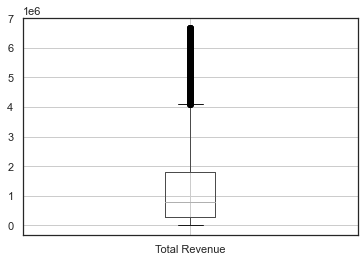

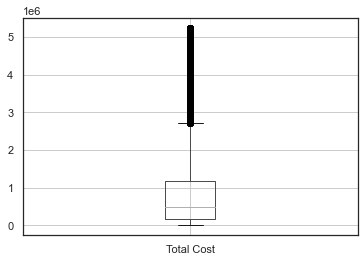

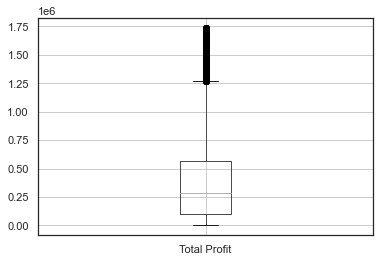

In [7]:
df.boxplot(column=["Total Revenue"])
plt.show()
df.boxplot(column=["Total Cost"])
plt.show()
df.boxplot(column=["Total Profit"])
plt.show()

* Looking at the box plot, it seems that the variables Total, Revenue, TOtal Cost and Total Profit, have outliers present inside them. These outliers value needs to be teated and we can treat them with different ways such as following :

    1. Drop the outlier value
    2. Replace the outlier value using the IQR

In [8]:
# Creating a function to check the outlier and remove them 

def remove_outlier(variable):
    sorted(variable)
    Q1, Q3 = variable.quantile([0.25, 0.75])
    IQR = Q3-Q1
    lowerValue = Q1-(1.5*IQR)
    higherValue = Q3+(1.5*IQR)
    return lowerValue, higherValue

lowRevenue, highRevenue = remove_outlier(df['Total Revenue'])
df['Total Revenue'] = np.where(df['Total Revenue'] > highRevenue, highRevenue, df['Total Revenue'])
df['Total Revenue'] = np.where(df['Total Revenue'] < lowRevenue, lowRevenue, df['Total Revenue'])

lowCost, highCost = remove_outlier(df['Total Cost'])
df['Total Cost'] = np.where(df['Total Cost'] > highCost, highCost, df['Total Cost'])
df['Total Cost'] = np.where(df['Total Cost'] < lowCost, lowCost, df['Total Cost'])

lowProfit, highProfit = remove_outlier(df['Total Profit'])
df['Total Profit'] = np.where(df['Total Profit'] > highProfit, highProfit, df['Total Profit'])
df['Total Profit'] = np.where(df['Total Profit'] < lowProfit, lowProfit, df['Total Profit'])


# Boxplots post removing outlier

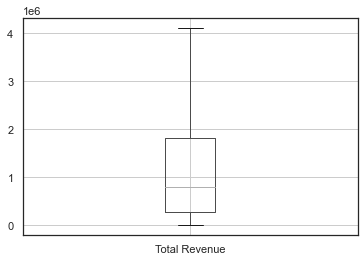

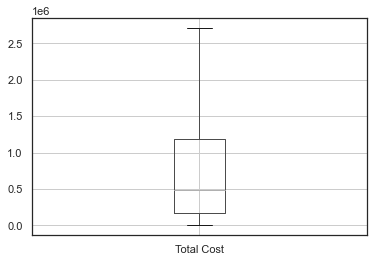

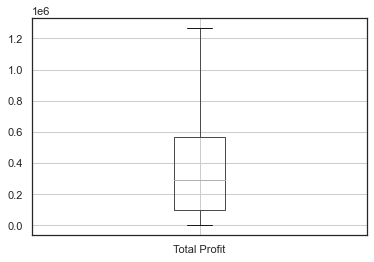

In [9]:
df.boxplot(column=["Total Revenue"])
plt.show()
df.boxplot(column=["Total Cost"])
plt.show()
df.boxplot(column=["Total Profit"])
plt.show()

# 4. Variable Analysis

In [10]:
df.corr()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Order ID,1.000000,-0.019732,0.012175,0.010449,-0.006921,-0.007360,-0.005367
Units Sold,-0.019732,1.000000,-0.012978,-0.012441,0.524582,0.465002,0.603328
Unit Price,0.012175,-0.012978,1.000000,0.986324,0.743716,0.775779,0.580710
Unit Cost,0.010449,-0.012441,0.986324,1.000000,0.729976,0.781030,0.510704
Total Revenue,-0.006921,0.524582,0.743716,0.729976,1.000000,0.985395,0.888720
Total Cost,-0.007360,0.465002,0.775779,0.781030,0.985395,1.000000,0.809541
Total Profit,-0.005367,0.603328,0.580710,0.510704,0.888720,0.809541,1.000000


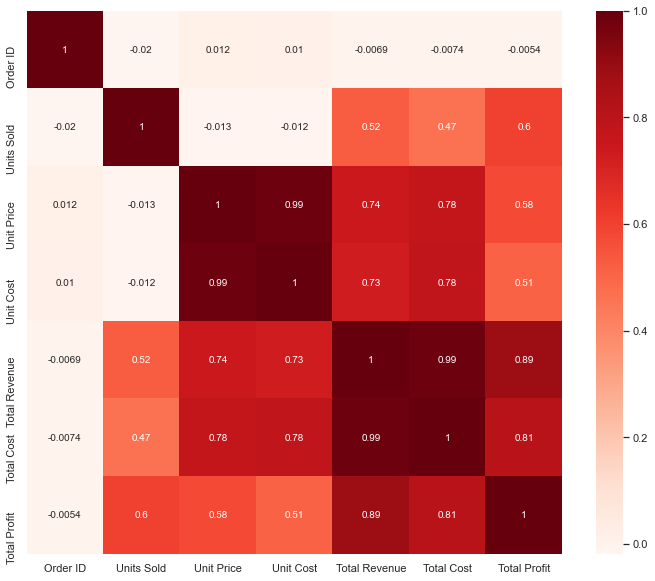

In [11]:
# Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [12]:
#Correlation with output variable
corrTarget = abs(cor["Total Profit"])

#Selecting highly correlated features with Target Variable Total Profit
relevantFeatures = corrTarget[corrTarget>0.5]
relevantFeatures

Units Sold       0.603328
Unit Price       0.580710
Unit Cost        0.510704
Total Revenue    0.888720
Total Cost       0.809541
Total Profit     1.000000
Name: Total Profit, dtype: float64

* Here, we're selecting the features whose having highest relation with our target variable. And those are units Sold, Unit Price, Unit Cost, Total Revenue, Total Cost

# 5. Normalizing and Scaling

>> we convert variables with different scales of measurements into a single scale. StandardScaler normalizes the data using the formula (x-mean)/standard deviation. We will be doing this only for the numerical variables.

In [13]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
stdScaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
# Let's do feature scaling for model building
df['Units Sold'] = stdScaler.fit_transform(df[['Units Sold']])
df['Unit Price'] = stdScaler.fit_transform(df[['Unit Price']])
df['Unit Cost'] = stdScaler.fit_transform(df[['Unit Cost']])
df['Total Revenue'] = stdScaler.fit_transform(df[['Total Revenue']])
df['Total Cost'] = stdScaler.fit_transform(df[['Total Cost']])
df['Total Profit'] = stdScaler.fit_transform(df[['Total Profit']])

# 6. ENCODING
>> One-Hot-Encoding is used to create dummy variables to replace the categories in a categorical variable into features of each category and represent it using 1 or 0 based on the presence or absence of the categorical value in the record.

In [15]:
new_data = pd.get_dummies(data=df, columns=['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority'])

In [16]:
new_data.head()

,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Region_Asia,...,Item Type_Office Supplies,Item Type_Personal Care,Item Type_Snacks,Item Type_Vegetables,Sales Channel_Offline,Sales Channel_Online,Order Priority_C,Order Priority_H,Order Priority_L,Order Priority_M
0,1/27/2011,292494523,2/12/2011,-0.180591,1.757726,1.905231,1.328165,1.739918,0.510121,0,...,1,0,0,0,0,1,0,0,1,0
1,12/28/2015,361825549,1/23/2016,-1.367113,-1.012664,-0.889930,-0.959497,-0.912310,-1.047428,0,...,0,0,0,0,0,1,1,0,0,0
2,1/13/2011,141515767,2/1/2011,0.526310,-0.523478,-0.554740,-0.199851,-0.274065,0.071123,0,...,0,0,0,1,1,0,1,0,0,0
3,9/11/2012,500364005,10/6/2012,0.932840,1.836007,1.778160,2.281025,2.149749,2.502060,0,...,0,0,0,0,0,1,1,0,0,0
4,10/27/2015,127481591,12/5/2015,-0.526210,-1.012664,-0.889930,-0.868087,-0.824497,-0.940142,0,...,0,0,0,0,0,1,1,0,0,0


# 7. Feature Selection

>> Feature Selection is the process where you automatically or manually select those features which contribute most to your prediction variable or output in which you are interested in. 

In [17]:
new_data.corr()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Region_Asia,Region_Australia and Oceania,Region_Central America and the Caribbean,...,Item Type_Office Supplies,Item Type_Personal Care,Item Type_Snacks,Item Type_Vegetables,Sales Channel_Offline,Sales Channel_Online,Order Priority_C,Order Priority_H,Order Priority_L,Order Priority_M
Order ID,1.000000,-0.019732,0.012175,0.010449,-0.006921,-0.007360,-0.005367,-0.002730,-0.005808,0.004803,...,0.008097,-0.017770,0.001542,0.006021,0.030683,-0.030683,0.004665,-0.003423,0.006098,-0.007419
Units Sold,-0.019732,1.000000,-0.012978,-0.012441,0.524582,0.465002,0.603328,0.001824,-0.001648,0.009169,...,-0.008437,-0.004859,0.005143,0.007006,0.006071,-0.006071,0.008424,0.012763,0.002272,-0.023690
Unit Price,0.012175,-0.012978,1.000000,0.986324,0.743716,0.775779,0.580710,0.000465,-0.000991,0.009039,...,0.531245,-0.267026,-0.158061,-0.158110,0.005582,-0.005582,0.000420,-0.003576,0.003037,0.000120
Unit Cost,0.010449,-0.012441,0.986324,1.000000,0.729976,0.781030,0.510704,0.000336,-0.004745,0.010600,...,0.575826,-0.233794,-0.154357,-0.167552,0.004656,-0.004656,-0.002852,-0.003163,0.006017,0.000024
Total Revenue,-0.006921,0.524582,0.743716,0.729976,1.000000,0.985395,0.888720,0.008665,-0.002451,0.005945,...,0.367056,-0.211360,-0.114903,-0.113995,0.010310,-0.010310,0.000965,0.004788,0.007859,-0.013712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sales Channel_Online,-0.030683,-0.006071,-0.005582,-0.004656,-0.010310,-0.007802,-0.015086,0.009910,0.015242,-0.009069,...,0.005340,0.003926,-0.002176,-0.015970,-1.000000,1.000000,0.015095,-0.013745,0.003600,-0.005086
Order Priority_C,0.004665,0.008424,0.000420,-0.002852,0.000965,-0.002772,0.011627,0.003673,0.002003,-0.010122,...,-0.012298,-0.001519,-0.003759,0.027669,-0.015095,0.015095,1.000000,-0.338493,-0.337681,-0.333532
Order Priority_H,-0.003423,0.012763,-0.003576,-0.003163,0.004788,0.005242,0.005718,0.000202,-0.013203,0.000721,...,0.009585,0.009522,0.005696,0.002293,0.013745,-0.013745,-0.338493,1.000000,-0.333066,-0.328974
Order Priority_L,0.006098,0.002272,0.003037,0.006017,0.007859,0.008963,-0.000298,0.006941,0.000195,0.012118,...,0.007722,0.001245,-0.001275,-0.017952,-0.003600,0.003600,-0.337681,-0.333066,1.000000,-0.328185


In [18]:
# Using Pearson Correlation
corOfNewData = new_data.corr()

In [19]:
#Correlation with output variable
corr_Target = abs(corOfNewData["Total Profit"])

#Selecting highly correlated features with Target Variable having correlation > 0.5 
relevant_Features = corr_Target[corr_Target>0.5]
relevant_Features

Units Sold       0.603328
Unit Price       0.580710
Unit Cost        0.510704
Total Revenue    0.888720
Total Cost       0.809541
Total Profit     1.000000
Name: Total Profit, dtype: float64

* Here, post encoding, we can see the only features which are matters to predict or have correaltion with target variable is Units Sold, Unit Cost, Unit Price, Total Revenue, Total Cost as earlier seen. 

In [20]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,-0.180591,1.757726,1.905231,1.328165,1.739918,0.510121
1,Europe,Latvia,Beverages,Online,C,12/28/2015,361825549,1/23/2016,-1.367113,-1.012664,-0.889930,-0.959497,-0.912310,-1.047428
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,1/13/2011,141515767,2/1/2011,0.526310,-0.523478,-0.554740,-0.199851,-0.274065,0.071123
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,9/11/2012,500364005,10/6/2012,0.932840,1.836007,1.778160,2.281025,2.149749,2.502060
4,Europe,Czech Republic,Beverages,Online,C,10/27/2015,127481591,12/5/2015,-0.526210,-1.012664,-0.889930,-0.868087,-0.824497,-0.940142


In [21]:
# Dropping un-necessary variables
final_data = df.drop(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority', 'Order Date', 'Order ID','Ship Date'], axis = 1) 
final_data.head()

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,-0.180591,1.757726,1.905231,1.328165,1.739918,0.510121
1,-1.367113,-1.012664,-0.889930,-0.959497,-0.912310,-1.047428
2,0.526310,-0.523478,-0.554740,-0.199851,-0.274065,0.071123
3,0.932840,1.836007,1.778160,2.281025,2.149749,2.502060
4,-0.526210,-1.012664,-0.889930,-0.868087,-0.824497,-0.940142


# * Visualizing the relation between features with target variable

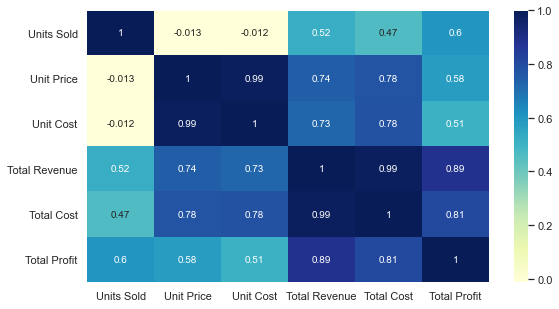

In [22]:
# Using Pearson Correlation
plt.figure(figsize=(9,5))
cor = final_data.corr()
sns.heatmap(cor, annot=True,  cmap="YlGnBu")
plt.show()

# 7. Model Building 

In [23]:
# SPlitting data into independent and dependent variable
X = final_data[['Units Sold','Unit Price','Unit Cost','Total Revenue','Total Cost']]
y = final_data['Total Profit']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [25]:
print(X_train.shape); print(X_test.shape)

(7000, 5)
(3000, 5)


In [26]:
# Importing Linear regression package
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
lr_model.fit(X_train, y_train)
print("Intercept", lr_model.intercept_)
print("Coefficient", lr_model.coef_)

Intercept -0.0005828778033226383
Coefficient [ 0.14735243  1.33245804 -1.26745682  2.02222013 -1.29741583]


In [28]:
lr_model.score(X_train, y_train)

0.9641577122019069

In [29]:
# Predicting the Test set results
y_pred = lr_model.predict(X_test)
y_pred

array([ 1.8490152 , -0.61866859,  0.99863333, ..., -0.22163234,
        1.19379994, -1.14739657])

# 8. Stats Models
>> By default, the statsmodel library fits a line that passes through the origin. But if we observe the simple linear regression equation y = c + mX, it has an intercept value as c. So, to have an intercept, we need to add the add_constant attribute manually.

In [31]:
# with statsmodels
import statsmodels.api as statModel
X_train_sm = statModel.add_constant(X_train) # adding a constant
lr_model = statModel.OLS(y_train, X_train_sm).fit()
#predictions = lr_model.predict(X) 
print("\n Params: \n", lr_model.params)
print("Model Summary: \n \n ", lr_model.summary())


 Params: 
 const           -0.000583
Units Sold       0.147352
Unit Price       1.332458
Unit Cost       -1.267457
Total Revenue    2.022220
Total Cost      -1.297416
dtype: float64
Model Summary: 
 
                              OLS Regression Results                            
Dep. Variable:           Total Profit   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 3.763e+04
Date:                Sat, 06 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:44:29   Log-Likelihood:                 1669.8
No. Observations:                7000   AIC:                            -3328.
Df Residuals:                    6994   BIC:                            -3287.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
       

# 9. Predictions 
>> Now from the dataset, We have to predict the y value from the training dataset of X using the predict attribute. After that, we’ll create the error terms(Residuals) from the predicted data.

In [32]:
# Predicting y_value using traingn data of X
y_train_pred = lr_model.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

# Predictions on the Test data or Evaluating the model
> Now that we have fitted the regression line on our train dataset, we can make some predictions to the test data. Similar to the training dataset, we have to add_constant to the test data and predict the y values using the predict attribute present in the statsmodel.

In [33]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr_model.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

8018    1.849015
9225   -0.618669
3854    0.998633
2029    0.358972
3539   -0.588347
          ...   
4208   -0.801513
5335    1.882711
2554   -0.221632
13      1.193800
4468   -1.147397
Length: 3000, dtype: float64

In [34]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.9623270945147675

In [35]:
print("\n Mean Squared Error :",np.sqrt(mean_squared_error(y_test,y_test_pred)))


 Mean Squared Error : 0.1908251819224405


* The R² value by using the above code = 0.9623
* If we can remember from the training data, the R² value = 0.964
  *  > Since the R² value on test data is within 5% of the R² value on training data, we can conclude that the model is pretty stable. Which means, what the model has learned on the training set can generalize on the unseen test set.

# B. Building Nonlinear Regression Model 

1. A nonlinear regression model is one that describes a nonlinear relationship between the dependent and the independent variables.

2. Naturally, the equation of the model is a nonlinear equation. How are nonlinear equations different from linear equations? The simple answer is that in a linear equation, the change in the dependent variable is always proportional to the change in the independent variable; however, in a nonlinear equation, the dependent variable changes disproportionately with a change in the independent variable.

* Degree of an equation
    > Nonlinear equations have a degree either less than 1, or greater than 1 (but never a degree equal to 1). Linear equations have a degree equal to 1.

    > A linear equation is of the form, y = ax + b. The variable x in this equation is raised to the power of 1. This is what we refer to when we say that the degree (also called the order) of the equation is 1.

    > A nonlinear equation would have a degree not equal to 1. For example, the equation y = ax2 + bx + c has one term with x raised to the power 2, and therefore, the degree (or order) of the equation is 2. Since this not an equation of order 1, it is a nonlinear equation.

# Model Building - RandomForestRegressor

In [36]:
# Import necessary packages
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [37]:
#model_r = RandomForestRegressor(oob_score=True, random_state=100)
model_rfr = RandomForestRegressor()
model_rfr

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [38]:
model_rfr.fit(X_train, y_train) 

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [39]:
pred_train_rf= model_rfr.predict(X_train)
print("\n Mean Squared Error :", np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print("\n R_Squared_Value :", r2_score(y_train, pred_train_rf))


 Mean Squared Error : 0.0026646675733301294

 R_Squared_Value : 0.999992995809448


In [40]:
pred_test_rf = model_rfr.predict(X_test)
print("\n Mean Squared Error :",np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print("\n R_Squared_Score :",r2_score(y_test, pred_test_rf))


 Mean Squared Error : 0.006384274756770041

 R_Squared_Score : 0.9999578322057299


# Conclusion

* >> By r2_Score we can say that RandomForestRegressor outperforms the Linear model.